***Meeting***

1 4k camera variable height
1x1 mm precision

Scaling on racer 1 cameras?

Which lens for Approximately 1.5 meters height

LED lights?

----

Nye camera i august (incl low res, som er nemmere og billigere)

5GigE

David vil gerne have Pylon

Put GigE kort i computer

Float transformation

binding

Lense:

!Pixel size!

Vingetting

Lens selector (IMX540/2)


Lys fra smartgvision lights

1000 euros

LE Linear (LE1200)

1200 mm

10 degrees width 50 degree fan angle

Ellers fra et byggemarket



----
C mount lensens for 2k and 4k racer2 gige

not able to achieve high speed because of LED

pylon for racer2

reusable api for camera connectivity

racer2s




5gige recomended

fpg binning or sens binning

float binning scaling to a float

cmount size has to be as big as it is long

same resolution as well

light as close as possible

camera as far away as possible

any led lights can be used with differing results

efilux owned by css


2.74 micrometer MX540 vs 7 micrometer racer camera

# Udkast problemformulering
1 vej bredde: 3.5 m bredde
tættest på som muligt uden !lens distortion!

Enten 0.5 Meter eller 2 Meter

hvis man køber et 4k camera kan man så gå til et 1080p mode?



# Line scan camera model
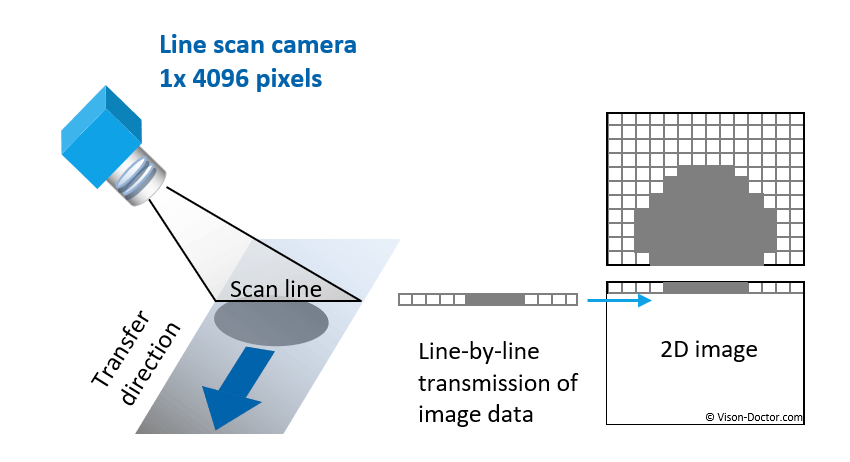


In [2]:
import matplotlib.pyplot as plt
import numpy as np

class lineScanCam:
    def __init__(self, focal, WD, CamSpecs):
        # Assign
        self.focal = focal  # Assuming focal length is in mm
        self.WD = WD  # Working distance in meters
        # Unpack the specs
        self.resolution_h, self.resolution_v = CamSpecs.get("Resolution", (0, 0))
        self.pixel_size_h, self.pixel_size_v = CamSpecs.get("Pixel Size", (0.0, 0.0))  # Assuming µm
        self.line_rate = CamSpecs.get("Line Rate", 0)
        # Small calculations

    def getFOV(self):
        # Convert focal length to meters from mm, same for pixel width
        focal_length_m = self.focal / 1000  # Convert mm to meters
        pixel_width_m = self.pixel_size_h / 1e6  # Convert µm to meters

        # Calculate sensor width
        sensor_width_m = self.resolution_h * pixel_width_m

        # Calculate FOV
        FOV = (sensor_width_m / focal_length_m) * self.WD
        return FOV

    def getSpartial(self):
        # Calculate spatial resolution in meters per pixel
        FOV = self.getFOV()
        spatial_resolution = FOV / self.resolution_h
        return spatial_resolution*1000

    def getMaxSpeed(self):
        # Calculate maximum speed in m/s then convert to km/h
        spatial_resolution = self.getSpartial()
        max_speed_m_per_s = spatial_resolution * self.line_rate
        max_speed_km_per_h = max_speed_m_per_s * 3.6
        return max_speed_km_per_h
    
    def calculateLineRate(self, speed_kmh):
        # Convert speed from km/h to m/s
        speed_ms = speed_kmh * 1000 / 3600

        # Calculate spatial resolution (in meters per pixel)
        spatial_resolution_m = self.getSpartial() / 1000  # Convert mm to meters

        # Calculate line rate in lines per second
        line_rate = speed_ms / spatial_resolution_m
        return line_rate
    
    def calculateMaxExposureTime(self, speed_kmh):
        # Convert speed from km/h to m/s
        speed_ms = speed_kmh * 1000 / 3600

        # Calculate spatial resolution (in meters per pixel)
        spatial_resolution_m = self.getSpartial() / 1000  # Convert mm to meters

        # Maximum exposure time to avoid motion blur (in seconds)
        max_exposure_time = spatial_resolution_m / speed_ms
        return max_exposure_time * 1e6  # Return in milliseconds
    
    def __str__(self):
        return (f"Resolution: {self.resolution_h} x {self.resolution_v} pixels\n"
                f"Pixel Size: {self.pixel_size_h} x {self.pixel_size_v} µm\n"
                f"Line Rate: {self.line_rate} lines/s\n"
                f"FOV: {self.getFOV()} m\n"
                f"Spatial resolution: {self.getSpartial()} mm/pixel\n")

--------------------------------
Resolution: 4096 x 1 pixels
Pixel Size: 3.5 x 3.5 µm
Line Rate: 80000 lines/s
FOV: 1.450465882352941 m
Spatial resolution: 0.3541176470588235 mm/pixel

Line rate at 5 km/h: 3922.1114802510156 lines/sec
Maximum exposure time to avoid motion blur: 254.965 us


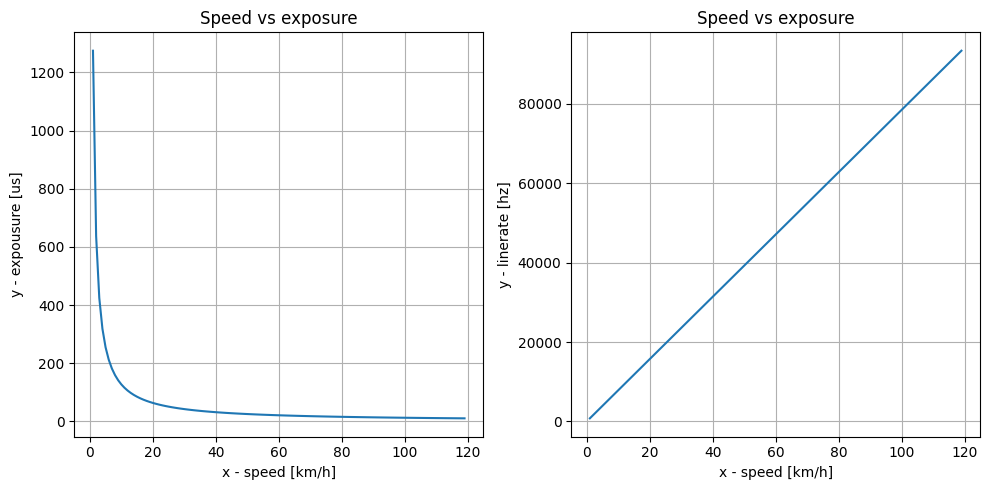

In [9]:
WD = 0.86 #m
speed_kmh = 5 #km/h

print("--------------------------------")
# raL4096-48gm
CamSpecs2 = {
    "Resolution": (4096, 1),  # 4096 pixels in horizontal direction, 1 pixel in vertical direction
    "Pixel Size": (3.5, 3.5),  # µm
    "Line Rate": 80000  # lines/s
}

camera2 = lineScanCam(focal=8.5, WD=WD, CamSpecs=CamSpecs2)
print(camera2)

line_rate = camera2.calculateLineRate(speed_kmh)
max_exposure_time = camera2.calculateMaxExposureTime(speed_kmh)

print(f"Line rate at {speed_kmh} km/h: {line_rate} lines/sec")
print(f"Maximum exposure time to avoid motion blur: {max_exposure_time:.3f} us")

speed_array = np.arange(1,120,1)
speed_array = np.arange(1,120,1)
speed_array = np.arange(1,120,1)
max_exposure_array = []
line_rate_array = []
for i in speed_array:
    max_exposure_array.append(camera2.calculateMaxExposureTime(i))
    line_rate_array.append(camera2.calculateLineRate(i))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
ax1.plot(speed_array, max_exposure_array)
ax1.set_xlabel('x - speed [km/h]')
ax1.set_ylabel('y - expousure [us]')  
ax1.set_title('Speed vs exposure')
ax1.grid()

ax2.plot(speed_array, line_rate_array)
ax2.set_xlabel('x - speed [km/h]')
ax2.set_ylabel('y - linerate [hz]')  
ax2.set_title('Speed vs exposure')
ax2.grid()

plt.tight_layout()
plt.show()

Light more light:

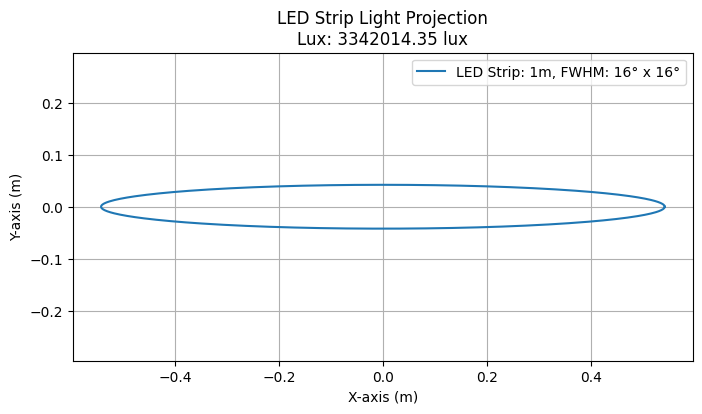

Elliptical light projection area: 0.0718 m²
Illuminance (lux): 3342014.35 lux


In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Given values
strip_length = 1 # Length of the LED strip in meters
FWHM_major = 16  # degrees (spread angle along the strip)
FWHM_minor = 16  # degrees (spread angle perpendicular to the strip)
distance = 0.3  # Distance from the strip to the surface (meters)
lumens = 240000  # Total lumens of the LED strip

# Convert FWHM to half angles
major_half_angle = np.radians(FWHM_major / 2)  # Convert to radians (along the strip)
minor_half_angle = np.radians(FWHM_minor / 2)  # Convert to radians (perpendicular to the strip)

# Calculate the light spread lengths based on the FWHM angles
L_major_spread = 2 * distance * np.tan(major_half_angle)  # Spread along the strip
W_minor_spread = 2 * distance * np.tan(minor_half_angle)  # Spread perpendicular to the strip

# Combine the strip length and light spread to get the total effective length of the light beam
L_total = strip_length + L_major_spread  # Total major axis length including strip length
W_minor = W_minor_spread  # The minor axis is still based on the perpendicular spread

# The area of the light projection is modeled as an ellipse
area_ellipse = np.pi * (L_total / 2) * (W_minor / 2)

# Calculate the lux (lux = lumens / area)
lux = lumens / area_ellipse

# Parametric equation of the light projection (ellipse-like shape)
theta = np.linspace(0, 2 * np.pi, 400)
x = (L_total / 2) * np.cos(theta)  # Total length along the strip defines the major axis
y = (W_minor / 2) * np.sin(theta)  # Spread perpendicular to the strip defines the minor axis

# Plot the light projection
plt.figure(figsize=(8, 4))
plt.plot(x, y, label=f"LED Strip: {strip_length}m, FWHM: {FWHM_major}° x {FWHM_minor}°")
plt.title(f"LED Strip Light Projection\nLux: {lux:.2f} lux")
plt.xlabel("X-axis (m)")
plt.ylabel("Y-axis (m)")
plt.axis('equal')
plt.grid(True)
plt.legend()
plt.show()

# Print out the lux and area for reference
print(f"Elliptical light projection area: {area_ellipse:.4f} m²")
print(f"Illuminance (lux): {lux:.2f} lux")


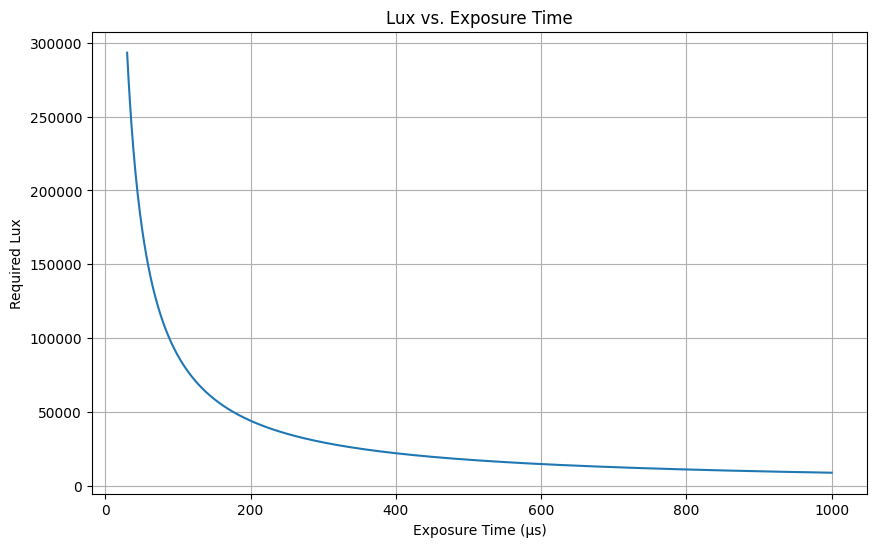

Exposure 5 km/t (355us): 24788.732394366198 lux
Exposure 50 km/t (35us): 251428.57142857145 lux
Exposure 110000.0 lux


In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Given values
reference_exposure = 80e-6#770e-6  # Reference exposure time in seconds (770 us)
reference_lux = 110000#16500  # Reference lux value
distance = 0.27  # Distance in meters
beam_angle = 120  # Angle of light beam in degrees

# Function to calculate the required lux at different exposure times
def calculate_lux(exposure_times, ref_exposure, ref_lux):
    return ref_lux * (ref_exposure / exposure_times)

# Generate a range of exposure times from 0.01 ms to 1 ms
exposure_times = np.linspace(30e-6, 1e-3, 1000)  # in seconds

# Calculate the corresponding lux values
lux_values = calculate_lux(exposure_times, reference_exposure, reference_lux)

# Plot the lux as a function of exposure time
plt.figure(figsize=(10, 6))
plt.plot(exposure_times * 1e6, lux_values)  # Convert x-axis to microseconds
plt.xlabel('Exposure Time (µs)')
plt.ylabel('Required Lux')
plt.title('Lux vs. Exposure Time')
plt.grid(True)
plt.show()

print(f"Exposure 5 km/t (355us): {calculate_lux(355e-6, reference_exposure, reference_lux)} lux")
print(f"Exposure 50 km/t (35us): {calculate_lux(35e-6, reference_exposure, reference_lux)} lux")
print(f"Exposure {calculate_lux(80e-6, reference_exposure, reference_lux)} lux")
